<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/16_4_Data_Cleaning_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [0]:
#using the previous exercise as a guide, I believe the state by state manipulation was the best choice

columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
           "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
           "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
           "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
           "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
           "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
           "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

edu5_df = edu_df.copy()
state = edu5_df["STATE"].unique()

for col in columns:
    for state in states:
        edu5_df.loc[edu5_df["STATE"] == state, col] = edu5_df.loc[edu5_df["STATE"] == state, col].fillna(edu5_df[edu5_df["STATE"] == state][col].mean())
        
edu5_df.dropna(inplace=True)
edu5_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736584.333333,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,...,57948.000000,58025.000000,41167.000000,471564.000000,196386.000000,676174.000000,208.327876,252.187522,207.963517,264.081357
1,1992_ALASKA,ALASKA,1992,130429.625000,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,...,9748.000000,8789.000000,6714.000000,79117.000000,30847.000000,112335.000000,234.009817,280.397007,210.664251,258.859712
2,1992_ARIZONA,ARIZONA,1992,874322.083333,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,...,55433.000000,49081.000000,37410.000000,437127.000000,175210.000000,614881.000000,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,451901.916667,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,...,34632.000000,36011.000000,27651.000000,281338.000000,123113.000000,405259.000000,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,5945343.041667,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,...,418418.000000,363296.000000,270675.000000,3286034.000000,1372011.000000,4717112.000000,208.398961,260.892247,196.764414,261.902652
5,1992_COLORADO,COLORADO,1992,751567.750000,3185173.000000,163253.000000,1307986.000000,1713934.000000,3264826.000000,1642466.000000,...,50648.000000,45025.000000,34533.000000,394904.000000,160299.000000,562613.000000,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,523130.666667,3834302.000000,143542.000000,1342539.000000,2348221.000000,3721338.000000,2148041.000000,...,38058.000000,33691.000000,28366.000000,304284.000000,126917.000000,436932.000000,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,113638.333333,645233.000000,45945.000000,420942.000000,178346.000000,638784.000000,372722.000000,...,8272.000000,8012.000000,6129.000000,67495.000000,28338.000000,96296.000000,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,60531.185185,709480.000000,64749.000000,0.000000,644731.000000,742893.000000,329160.000000,...,5832.000000,5000.000000,3433.000000,47009.000000,18173.000000,70000.000000,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,2486440.583333,11506299.000000,788420.000000,5683949.000000,5033930.000000,11305642.000000,5166374.000000,...,164416.000000,142372.000000,100835.000000,1276685.000000,511557.000000,1819706.000000,213.689751,259.908848,204.882606,262.118986


In [0]:
edu5_df.isnull().sum()*100/edu5_df.isnull().count()

PRIMARY_KEY                    0.000000
STATE                          0.000000
YEAR                           0.000000
ENROLL                         0.000000
TOTAL_REVENUE                  0.000000
FEDERAL_REVENUE                0.000000
STATE_REVENUE                  0.000000
LOCAL_REVENUE                  0.000000
TOTAL_EXPENDITURE              0.000000
INSTRUCTION_EXPENDITURE        0.000000
SUPPORT_SERVICES_EXPENDITURE   0.000000
OTHER_EXPENDITURE              0.000000
CAPITAL_OUTLAY_EXPENDITURE     0.000000
GRADES_PK_G                    0.000000
GRADES_KG_G                    0.000000
GRADES_4_G                     0.000000
GRADES_8_G                     0.000000
GRADES_12_G                    0.000000
GRADES_1_8_G                   0.000000
GRADES_9_12_G                  0.000000
GRADES_ALL_G                   0.000000
AVG_MATH_4_SCORE               0.000000
AVG_MATH_8_SCORE               0.000000
AVG_READING_4_SCORE            0.000000
AVG_READING_8_SCORE            0.000000


#1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

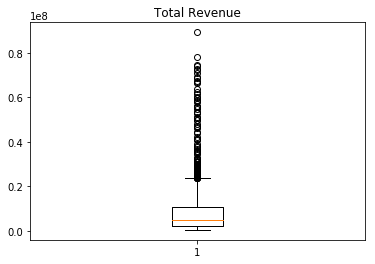

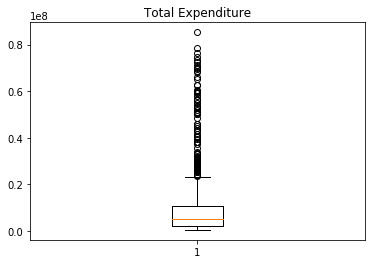

In [0]:
plt.boxplot(edu5_df['TOTAL_REVENUE'])
plt.title('Total Revenue')
plt.show()

plt.boxplot(edu5_df['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure')
plt.show()

As we can see, there are many outliers in these variables.

#2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [0]:
winsorized_revenue = winsorize(edu5_df['TOTAL_REVENUE'], (0, 0.10))
winsorized_expenditure = winsorize(edu5_df['TOTAL_EXPENDITURE'], (0, 0.10))

print(winsorized_revenue)
print(winsorized_expenditure)

[2678885.   1049591.   3258079.   ... 2664419.   8944846.84 1173952.68]
[2653798.    972488.   3401580.   ... 2670432.28 8995488.76 1152672.48]


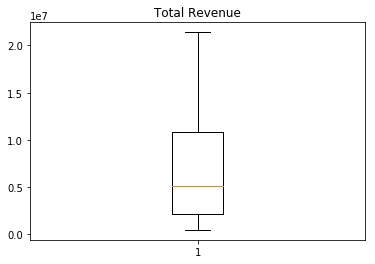

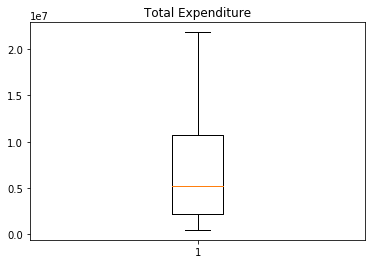

In [0]:
plt.boxplot(winsorized_revenue)
plt.title('Total Revenue')
plt.show()

plt.boxplot(winsorized_expenditure)
plt.title('Total Expenditure')
plt.show()

Poof... outliers gone.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

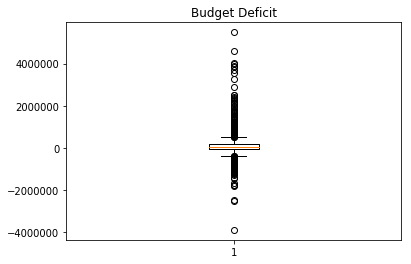

In [0]:
edu5_df['budget_deficit'] = edu5_df['TOTAL_EXPENDITURE'] - edu5_df['TOTAL_REVENUE']
budget_deficit = edu5_df['budget_deficit']

plt.boxplot(edu5_df['budget_deficit'])
plt.title('Budget Deficit')
plt.show()

We have some notable outliers of outliers. Let's eliminate these then move on.

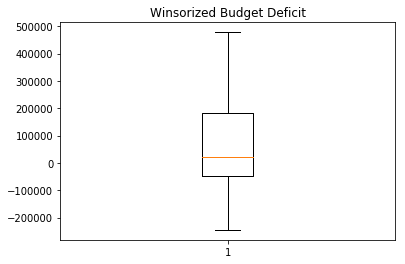

In [0]:
winsorized_budget_deficit = winsorize(edu5_df['budget_deficit'], (0.10, 0.10))

plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')
plt.show()

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

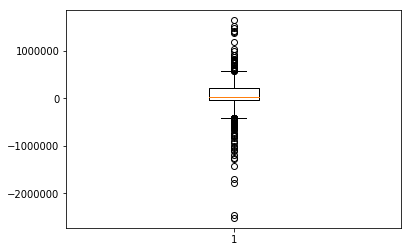

In [0]:
edu5_df['winsorized_revenue'] = winsorized_revenue
edu5_df['winsorized_expenditure'] = winsorized_expenditure
edu5_df['winsorized_budget_def'] = edu5_df['winsorized_expenditure'] - edu5_df['winsorized_revenue']

plt.boxplot(edu5_df['winsorized_budget_def'])
plt.show()

ALERT: Outliers found

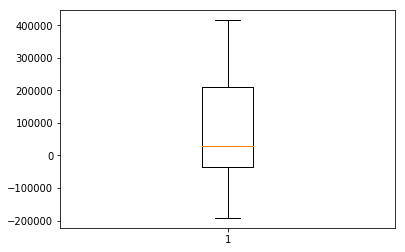

In [0]:
winsorized_budget_deficit2 = winsorize(edu5_df['winsorized_budget_def'], (0.10, 0.10))
plt.boxplot(winsorized_budget_deficit2)
plt.show()

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [0]:
pd.DataFrame({'budget_deficit':budget_deficit, 'winsorized_budget':winsorized_budget_deficit, 'winsorized_budget2':winsorized_budget_deficit2}).describe()

,budget_deficit,winsorized_budget,winsorized_budget2
count,1331.000000,1331.000000,1331.000000
mean,104600.423710,65177.259563,83728.455145
std,566599.363255,207331.043974,193708.750881
min,-3897129.000000,-245065.000000,-191821.000000
25%,-48974.500000,-48974.500000,-36136.500000
50%,20470.000000,20470.000000,28045.000000
75%,181025.500000,181025.500000,211840.000000
max,5487742.000000,478143.000000,415400.520000


There are many differences between the original and winsorized data. Perhaps the most noticeable difference is the difference in standard deviations between them. The maximums and minimums are also very noticeable. It's interesting that the median doesn't change from the original to the first variant, and then increases in the second variant. 

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I think taking a step wise approach is the better method so I think the 3rd question method is most appropriate.